In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

# 0. 데이터 호출
https://data.seoul.go.kr/dataList/1/literacyView.do</br>
서울시코로나19확진자현황 데이터 사용

In [110]:
df = pd.read_csv('./Data/서울시 코로나19 확진자 현황.csv', encoding = 'utf-8')
df

/var/folders/z_/klqlrq151nv7wlzdmp2krt8h0000gn/T/ipykernel_2983/2642508589.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Data/서울시 코로나19 확진자 현황.csv', encoding = 'utf-8')


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99546,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99547,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99548,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


# 1. 데이터 확인 및 전처리

## 1.1 컬럼별 데이터 확인

In [111]:
df['환자번호'].unique()

array([nan])

In [112]:
df['국적'].unique()

array([nan])

In [113]:
df['환자정보'].unique()

array([nan])

In [114]:
df['조치사항'].unique()

array([nan])

In [115]:
df['상태'].unique()

array(['-', '퇴원', '사망', '42'], dtype=object)

In [116]:
df['이동경로'].unique()

array([nan, '이동경로 공개기간 경과'], dtype=object)

## 1.2 불필요한 컬럼 삭제

In [117]:
df = df.drop(['환자번호','국적','환자정보','조치사항','이동경로','등록일','수정일','노출여부'],axis = 1, inplace = False)
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


## 1.3 자료형 변환

In [118]:
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

In [119]:
# df['확진일'] datetime으로 타입변환
df['확진일'] = pd.to_datetime(df['확진일'])

In [120]:
df['지역'].nunique()

29

In [121]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [122]:
# df['지역'] 공백 제거 -> 타시도, 성북구
df['지역'] = df['지역'].str.strip()

In [123]:
df['지역'].nunique()

27

In [124]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

In [125]:
# df['지역'] object형 -> category형
df['지역'] = df['지역'].astype('category')

In [126]:
# df['상태'] object형 -> category형
df['상태'] = df['상태'].astype('category')

In [127]:
df.dtypes

연번              int64
확진일    datetime64[ns]
지역           category
여행력            object
접촉력            object
상태           category
dtype: object

## 1.4 결측치 처리

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(1), object(2)
memory usage: 3.2+ MB


In [129]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

In [130]:
df[df['여행력'].isnull()]

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99540,10,2020-02-05,성북구,NaN,종로구 집단발병,퇴원
99543,7,2020-01-31,종로구,NaN,종로구 집단발병,퇴원
99544,6,2020-01-31,종로구,NaN,종로구 집단발병,퇴원
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원


In [131]:
df[df['여행력'].notnull()]

,연번,확진일,지역,여행력,접촉력,상태
557,98993,2021-09-28,용산구,나이지리아,해외유입,-
558,98992,2021-09-28,용산구,나이지리아,해외유입,-
675,98875,2021-09-28,강남구,영국,해외유입,-
855,98695,2021-09-28,서초구,싱가폴,해외유입,-
1459,98091,2021-09-27,강남구,프랑스,해외유입,-
...,...,...,...,...,...,...
99541,9,2020-02-05,송파구,아시아,해외유입,퇴원
99542,8,2020-02-02,타시도,중국,해외유입,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


# 2. 구별 확진자 동향

## 2.1 확진일별 구별 확진자수 집계

In [132]:
# 피벗테이블
df_구 = pd.pivot_table(df, index = '확진일', columns = '지역', values = '연번', aggfunc = 'count', margins = True)
df_구

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


## 2.1.2 서울시 일별 추가확진자 동향

In [133]:
# date -> Series형태
date = df_구['All'][:-1]
date

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [134]:
# 서울시 일별 추가확진자가 많았던 순
date.sort_values(ascending = False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

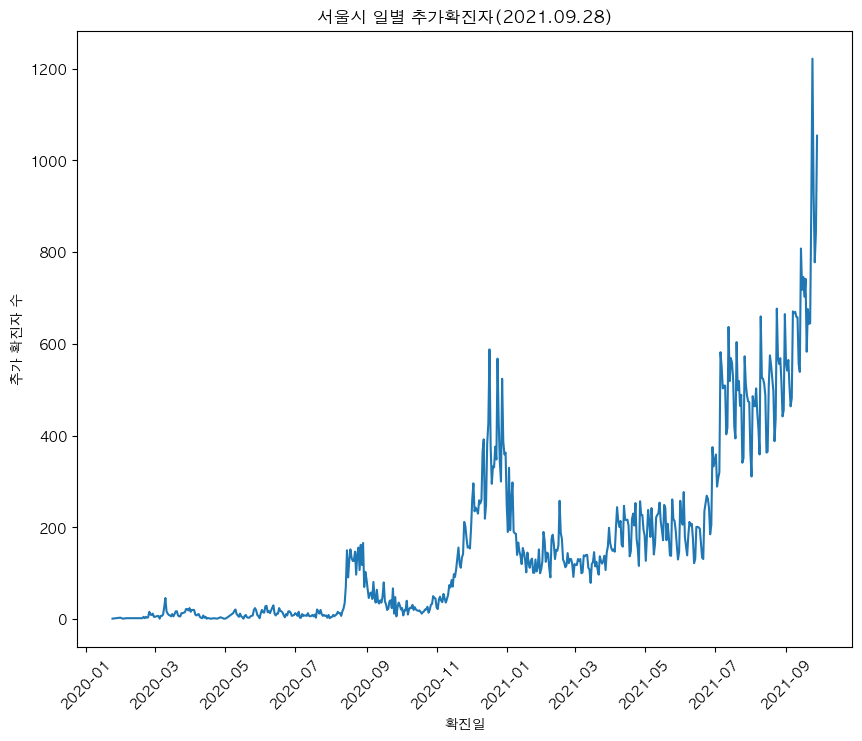

In [135]:
# 서울시 일별 추가확진자 시각화
x = date.index
y = date.values
plt.figure(figsize = (10, 8))
plt.plot(x, y)
plt.title('서울시 일별 추가확진자(2021.09.28)')
plt.xlabel('확진일')
plt.ylabel('추가 확진자 수')
plt.xticks(rotation = 45)
plt.show()

## 2.1.3 서울시 구별 누적추가확진자 동향

In [136]:
# loc -> Series형태
loc = df_구.loc['All'][:-1]
loc

지역
강남구     6926
강동구     3782
강북구     2606
강서구     4447
관악구     5418
광진구     3486
구로구     4168
금천구     2064
기타      2321
노원구     3932
도봉구     2605
동대문구    3487
동작구     4120
마포구     3726
서대문구    2692
서초구     4284
성동구     2839
성북구     3779
송파구     6356
양천구     3291
영등포구    4463
용산구     2705
은평구     4284
종로구     1617
중구      1708
중랑구     3729
타시도     4715
Name: All, dtype: int64

In [137]:
# 서울시 구별 누적확진자 많은 순
loc = loc.sort_values(ascending = False)

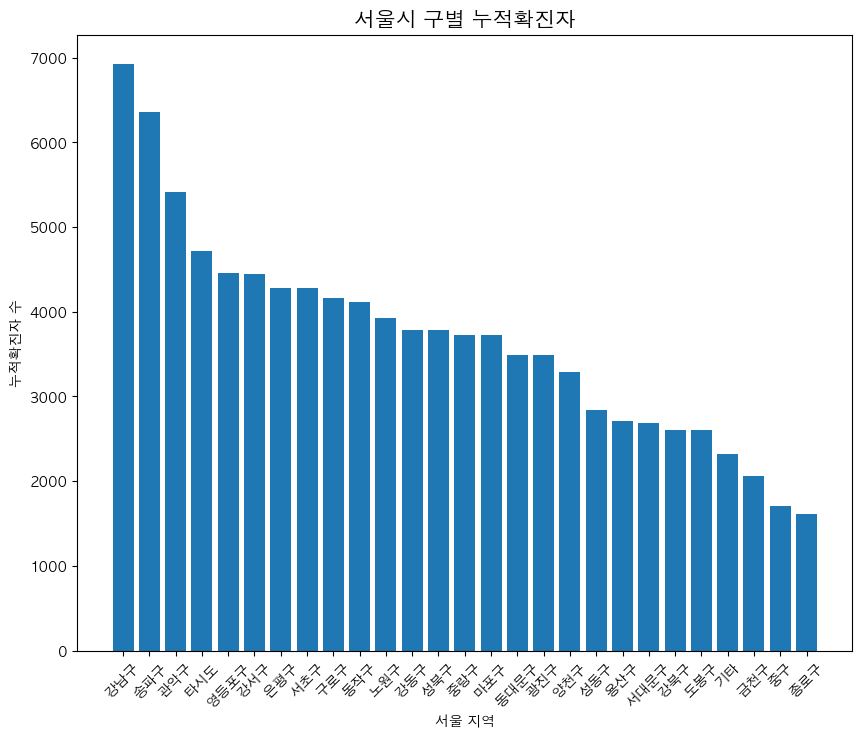

In [138]:
# 서울시 구별 누적확진자 시각화
x = loc.index
y = loc.values
plt.figure(figsize = (10, 8))
plt.bar(x, y)
plt.title('서울시 구별 누적확진자',size = 15)
plt.xlabel('서울 지역')
plt.ylabel('누적확진자 수')
plt.xticks(rotation = 45)
plt.show()

## 2.1.4 서울시 최근일 기준 지역별 추가확진자 동향

In [139]:
df_구

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [140]:
loc = df_구.iloc[-2][:-1]
loc = loc.sort_values(ascending = False)

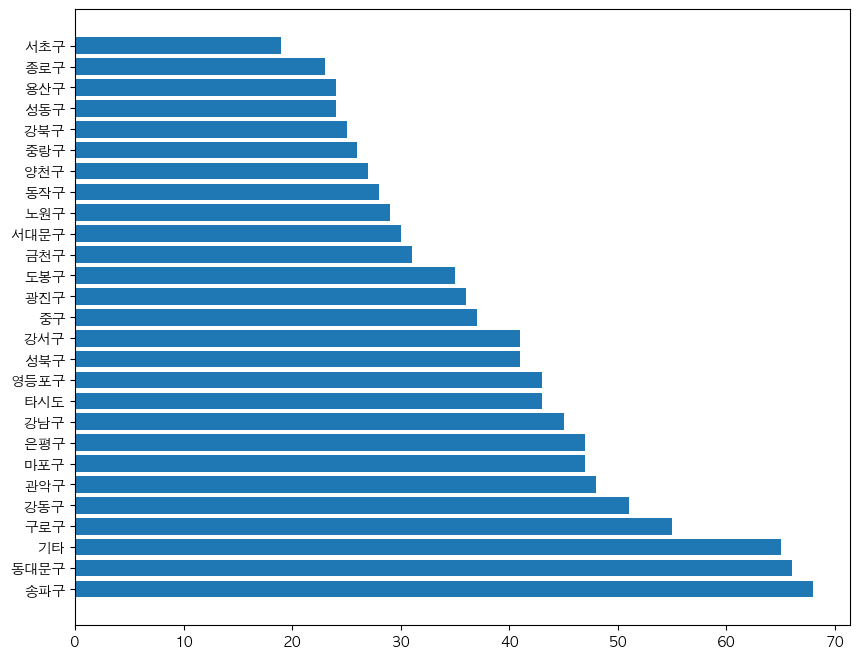

In [141]:
x = loc.index
y = loc.values
plt.figure(figsize = (10, 8))
plt.barh(x, y)
plt.show()

## 2.2 접촉력에 따른 확진 분석
### 2.2.1 접촉력에 따른 확진건수 best10

In [142]:
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


In [143]:
pd.DataFrame(df['접촉력'].value_counts()[:10])

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


### 2.2.2 최근월 접촉력에 따른 확진 건수 best 10
* 2021-09

In [144]:
pd.DataFrame(df[(df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)]['접촉력'].value_counts()[:10])

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
강서구 소재 시장 관련,44
